In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
train_data = pd.read_csv("C:/Users/ydc2020/OneDrive/桌面/2022暑期/Kaggle/train.csv")
test_data = pd.read_csv("C:/Users/ydc2020/OneDrive/桌面/2022暑期/Kaggle/test.csv")

In [2]:
columns = np.asarray(train_data.columns)
dtypes = np.asarray(train_data.dtypes)
num_columns = []
cat_columns = []

for column, dtype in zip(columns, dtypes):
    if dtype in ["int64", "float64"]:
        num_columns.append(column)
    else:
        cat_columns.append(column)
num_columns.remove("SalePrice")
print(num_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

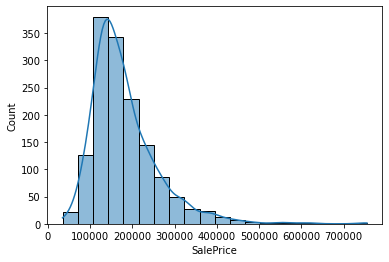

In [4]:
sns.histplot(data = train_data, x = "SalePrice", bins=20, kde = True)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
    ("Scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="median")),
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder())
])
from sklearn.compose import ColumnTransformer
preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_columns),
    ("cat", cat_pipeline, cat_columns)
])

In [6]:
train_data.drop("Id", axis=1)
X, y = train_data.iloc[:, :-1], train_data.iloc[:,-1]
X=preprocess_pipeline.fit_transform(X)
y=np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

AttributeError: 'Series' object has no attribute 'todense'

In [25]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,56.832192,69.208048,10412.381849,6.091610,5.570205,1971.309932,1984.935788,101.954623,428.845034,...,2.230308,1.237158,3.877568,3.904966,1.844178,1.995719,1.892979,1.997432,7.515411,3.770548
std,423.374184,42.477164,19.917104,9862.858810,1.367764,1.099288,30.125669,20.616883,177.221410,426.776508,...,1.768778,0.808750,0.576230,0.507401,0.516763,0.087714,0.433813,0.077406,1.554418,1.093921
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,373.750000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,8.000000,4.000000
50%,739.500000,50.000000,69.000000,9452.500000,6.000000,5.000000,1972.000000,1994.000000,0.000000,372.500000,...,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,8.000000,4.000000
75%,1107.250000,70.000000,78.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,163.250000,695.000000,...,5.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,8.000000,4.000000
max,1460.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2096.000000,...,5.000000,2.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,8.000000,5.000000


42.3 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


NameError: name 'y_pred_linear' is not defined

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(n_estimators=2000, verbose=3)

rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 2000
building tree 2 of 2000
building tree 3 of 2000
building tree 4 of 2000
building tree 5 of 2000
building tree 6 of 2000
building tree 7 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 10 of 2000
building tree 11 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 14 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000
building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building 

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.3min finished


RandomForestRegressor(n_estimators=2000, verbose=3)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
linear = Lasso()
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)
y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(rmse)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


0.17952977671131243


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished


In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
ada_rgr = AdaBoostRegressor(SVR(C=0.5), n_estimators=50, random_state=42, learning_rate=0.1)
ada_rgr.fit(X_train, y_train)
y_pred = ada_rgr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

0.15364525847274185


In [16]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

0.1749492997932886


In [24]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(
    estimators=[("ada", ada_rgr), ("random_forest", rfr), ("xgb", xgb_reg)],
    n_jobs=10
)
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


0.1557220920036106


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished


In [25]:
test_data.drop("Id", axis=1)
X_test_data = preprocess_pipeline.transform(test_data)
y_pred_linear = voting.predict(X_test_data)
y_pred_linear = np.exp(y_pred_linear)-1
y_pred_linear = pd.DataFrame(y_pred_linear).to_csv("C:/Users/ydc2020/OneDrive/桌面/2022暑期/Kaggle/try.csv")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished


In [54]:
from torch import nn
import torch
import torch.utils.data as Data
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.dnn = nn.Sequential(
            nn.Linear(289, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, X):
        y = self.dnn(X)
        return y
net = NeuralNetwork()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
batch_size = 64
X_train_tensor = torch.tensor(X_train.todense(), device=device).float()
y_train_tensor = torch.tensor(np.array(y_train), device=device).float()

train_dataset = Data.TensorDataset(X_train_tensor, y_train_tensor)
train_data_iter = Data.DataLoader(train_dataset, batch_size, shuffle=True)

In [55]:
loss = nn.MSELoss()
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.01)

In [57]:
epochs = 200
for epoch in range(1, epochs+1):
    for X, y in train_data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch %d loss : %f" %(epoch, l.item()))


epoch 1 loss : 0.007323
epoch 2 loss : 0.005031
epoch 3 loss : 0.005937
epoch 4 loss : 0.006849
epoch 5 loss : 0.014506
epoch 6 loss : 0.010530
epoch 7 loss : 0.003483
epoch 8 loss : 0.011420
epoch 9 loss : 0.007166
epoch 10 loss : 0.028861
epoch 11 loss : 0.035515
epoch 12 loss : 0.012274
epoch 13 loss : 0.021539
epoch 14 loss : 0.011633
epoch 15 loss : 0.033959
epoch 16 loss : 0.066402
epoch 17 loss : 0.021993
epoch 18 loss : 0.044260
epoch 19 loss : 0.016818
epoch 20 loss : 0.048033
epoch 21 loss : 0.007749
epoch 22 loss : 0.009388
epoch 23 loss : 0.006783
epoch 24 loss : 0.008479
epoch 25 loss : 0.002224
epoch 26 loss : 0.016725
epoch 27 loss : 0.011588
epoch 28 loss : 0.005245
epoch 29 loss : 0.019025
epoch 30 loss : 0.007779
epoch 31 loss : 0.004833
epoch 32 loss : 0.006452
epoch 33 loss : 0.007301
epoch 34 loss : 0.007500
epoch 35 loss : 0.005486
epoch 36 loss : 0.040805
epoch 37 loss : 0.063456
epoch 38 loss : 0.020679
epoch 39 loss : 0.025456
epoch 40 loss : 0.013900
epoch 41 

In [58]:
test_data.drop("Id", axis=1)
X_test_data = preprocess_pipeline.transform(test_data)
X_test_tensor = torch.tensor(X_test_data.todense(), device=device).float()
net.eval()
y_pred = net(X_test_tensor)


In [59]:
y_pred_cpu = y_pred.cpu()
y_pred_cpu = np.exp(y_pred_cpu.detach().numpy())-1
y_pred_cpu = pd.DataFrame(y_pred_cpu).to_csv("C:/Users/ydc2020/OneDrive/桌面/2022暑期/Kaggle/try.csv")

array([[127054.266],
       [190576.83 ],
       [197438.72 ],
       ...,
       [192432.94 ],
       [125832.016],
       [261445.2  ]], dtype=float32)